In [4]:
import numpy as np
import pandas as pd
import csv

In [5]:
dataset = []
with open("/content/Oder3.csv") as File:
    reader = csv.reader(File)
    for row in reader:
        dataset += [row]


In [6]:
dataset

[['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'],
 ['1', 'Bread', '10/30/2016 9:58', 'Morning', 'Weekend'],
 ['2', 'Scandinavian', '10/30/2016 10:05', 'Morning', 'Weekend'],
 ['2', 'Scandinavian', '10/30/2016 10:05', 'Morning', 'Weekend'],
 ['3', 'Hot chocolate', '10/30/2016 10:07', 'Morning', 'Weekend'],
 ['3', 'Jam', '10/30/2016 10:07', 'Morning', 'Weekend'],
 ['3', 'Cookies', '10/30/2016 10:07', 'Morning', 'Weekend'],
 ['4', 'Muffin', '10/30/2016 10:08', 'Morning', 'Weekend'],
 ['5', 'Coffee', '10/30/2016 10:13', 'Morning', 'Weekend'],
 ['5', 'Pastry', '10/30/2016 10:13', 'Morning', 'Weekend'],
 ['5', 'Bread', '10/30/2016 10:13', 'Morning', 'Weekend'],
 ['6', 'Medialuna', '10/30/2016 10:16', 'Morning', 'Weekend'],
 ['6', 'Pastry', '10/30/2016 10:16', 'Morning', 'Weekend'],
 ['6', 'Muffin', '10/30/2016 10:16', 'Morning', 'Weekend'],
 ['7', 'Medialuna', '10/30/2016 10:19', 'Morning', 'Weekend'],
 ['7', 'Pastry', '10/30/2016 10:19', 'Morning', 'Weekend'],
 ['7', 'Coffee', 

In [7]:
df = pd.DataFrame(dataset[1:],columns=dataset[0])

In [8]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,9/4/2017 14:32,Afternoon,Weekend
20503,9682,Tea,9/4/2017 14:32,Afternoon,Weekend
20504,9683,Coffee,9/4/2017 14:57,Afternoon,Weekend
20505,9683,Pastry,9/4/2017 14:57,Afternoon,Weekend


In [9]:
from mlxtend.preprocessing import TransactionEncoder

In [10]:
transactions = df.groupby('TransactionNo')['Items'].apply(list).to_list()

In [11]:
transactions

[['Bread'],
 ['Scandinavian', 'Medialuna'],
 ['Bread'],
 ['Scandinavian', 'Chimichurri Oil'],
 ['Bread', 'Truffles'],
 ['Brownie', 'Focaccia'],
 ['Coffee', 'Bread'],
 ['Coffee', 'Tea', 'Art Tray', 'Cookies'],
 ['Coffee'],
 ['Bread'],
 ['Coffee', 'Alfajores', 'Alfajores', 'Coke'],
 ['Bread'],
 ['Bread'],
 ['Coffee', 'Pastry'],
 ['Bread', 'Pastry', 'Medialuna', 'Coffee'],
 ['Coffee'],
 ['Bread', 'Keeping It Local'],
 ['Bread'],
 ['Coffee', 'Scandinavian'],
 ['Bread', 'Farm House', 'Pastry', 'Medialuna'],
 ['Medialuna'],
 ['Coffee'],
 ['Bread', 'Farm House'],
 ['Bread'],
 ['Farm House'],
 ['Keeping It Local', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Tea'],
 ['Coffee', 'Coffee', 'Pastry', 'Keeping It Local'],
 ['Coffee'],
 ['Tea'],
 ['Hot chocolate'],
 ['Tea', 'Sandwich'],
 ['Bread'],
 ['Medialuna', 'Muffin', 'Brownie'],
 ['Bread'],
 ['Coffee', 'Muffin'],
 ['Bread'],
 ['Coffee', 'Medialuna'],
 ['Coffee'],
 ['Coffee', 'Medialuna'],
 ['Coffee'],
 ['Coffee', 'Hot chocolate', 'Brownie', 'Bread'],

In [12]:
te = TransactionEncoder()

In [13]:
te_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_data,columns=te.columns_)

In [14]:
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
freq = apriori(df,min_support=0.01,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Bread, Coffee, Cake)"
59,0.011199,"(Bread, Coffee, Pastry)"


In [17]:
from mlxtend.preprocessing import TransactionEncoder

# One-hot encode the transactions
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
      support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Bread, Cake)
20  0.090016          (Bread, Coffee)
21  0.029160          (Bread, Pastry)
22  0.028104             (Bread, Tea)
23  0.054728           (Coffee, Cake)
24  0.023772              (Cak

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# Generate association rules
rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.25,
                          support_only=False,
                          num_itemsets=None) #This is a possible solution.
print("Association Rules:\n", rules)

Association Rules:
       antecedents    consequents  antecedent support  consequent support  \
0         (bread)         (beer)                 0.8                 0.4   
1          (beer)        (bread)                 0.4                 0.8   
2          (beer)         (eggs)                 0.4                 0.8   
3          (eggs)         (beer)                 0.8                 0.4   
4          (beer)         (milk)                 0.4                 0.6   
5          (milk)         (beer)                 0.6                 0.4   
6         (bread)         (eggs)                 0.8                 0.8   
7          (eggs)        (bread)                 0.8                 0.8   
8         (bread)         (milk)                 0.8                 0.6   
9          (milk)        (bread)                 0.6                 0.8   
10         (milk)         (eggs)                 0.6                 0.8   
11         (eggs)         (milk)                 0.8                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


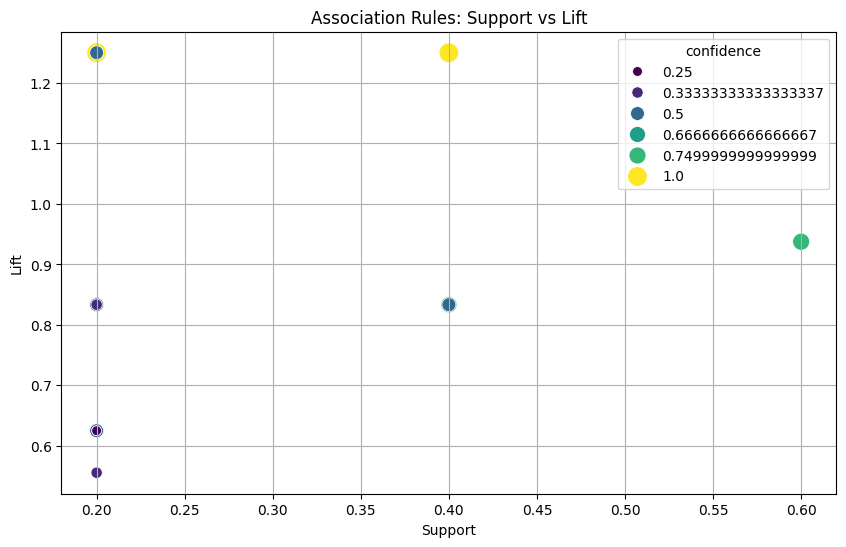

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='lift', size='confidence', hue='confidence', palette='viridis', sizes=(50, 200))
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()
